# Assignment 02

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Predictive Analytics
- Course ID: BDM500NAA.05379.2237
- Professor: Dr. Tamanna Eini Keleshteri

<b>All my observations are highlighted by <font color='limegreen'>this color</font> and comment out in the code.</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error

In [2]:
# import Boston data directly
# sklearn.datasets/load_boston() is not avaiable

df_origin = pd.read_csv('Boston.csv')
df_origin.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<b>dataset description</b>


- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's


Reference: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

# Data Preprocessing

In [3]:
# check missing values
np.sum(df_origin.isna(), axis=0)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
# dimension
print(df_origin.shape)
# observe the basic statistics
df_origin.describe()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
413,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
417,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


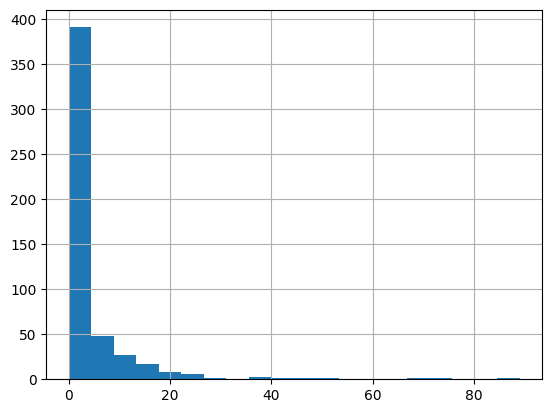

In [5]:
# Focused column: "crim" 
# its column may have outliers due to huge gaps between "75%" and "max"

# show histogram
df_origin['crim'].hist(bins=20)
# show all rows with more than three standard deviations
std_crim = df_origin.describe()['crim']['std']
df_origin[df_origin['crim'] >= 3*std_crim]

In [6]:
# remove possible outliers and create new dataframe; "df"
df = df_origin[df_origin['crim'] < 3*std_crim]
df_origin.shape, df.shape

((506, 14), (496, 14))

<font color='limegreen'>
- Based on the outlier removal, the total number of datasets are decreased by 10 data.
</font>

# Data Observations

In [7]:
# correlation matrix
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.264624,0.535796,-0.047047,0.565743,-0.268300,0.451393,-0.479468,0.819690,0.763662,0.364526,-0.407653,0.582992,-0.425535
zn,-0.264624,1.000000,-0.530649,-0.045521,-0.513678,0.308813,-0.567094,0.663092,-0.304929,-0.307585,-0.387219,0.169327,-0.413152,0.355141
indus,0.535796,-0.530649,1.000000,0.069298,0.759596,-0.383321,0.638444,-0.701668,0.583497,0.713756,0.373057,-0.346271,0.599964,-0.470003
chas,-0.047047,-0.045521,0.069298,1.000000,0.097658,0.087774,0.092516,-0.106199,0.001814,-0.027859,-0.117946,0.041834,-0.047724,0.171377
nox,0.565743,-0.513678,0.759596,0.097658,1.000000,-0.292283,0.728237,-0.765327,0.602001,0.660582,0.176108,-0.376632,0.583625,-0.410803
rm,-0.268300,0.308813,-0.383321,0.087774,-0.292283,1.000000,-0.227578,0.191565,-0.187929,-0.275147,-0.348705,0.098442,-0.604032,0.695050
age,0.451393,-0.567094,0.638444,0.092516,0.728237,-0.227578,1.000000,-0.743375,0.441587,0.494299,0.250481,-0.260410,0.599409,-0.361897
dis,-0.479468,0.663092,-0.701668,-0.106199,-0.765327,0.191565,-0.743375,1.000000,-0.478187,-0.520211,-0.219313,0.276327,-0.488054,0.227826
rad,0.819690,-0.304929,0.583497,0.001814,0.602001,-0.187929,0.441587,-0.478187,1.000000,0.905549,0.453421,-0.423628,0.469104,-0.352183
tax,0.763662,-0.307585,0.713756,-0.027859,0.660582,-0.275147,0.494299,-0.520211,0.905549,1.000000,0.449596,-0.423932,0.529476,-0.445438


Observations:
<font color='limegreen'>
- Although the columns "rad" and "tax" ae highly correlated with each other; 0.905549.
- Considering that both data are less likely to be derived, so I decided to keep the original columns.
- Also, this assignment is focusing on the classification and regression tree, so I determined that multicollinearity may not be a problem like in the linear regression.
</font>

In [8]:
# define feature matrix and target variable
X_cols = list(df.columns)
X_cols.remove('medv')
X = np.array(df[X_cols])
y = np.array(df[['medv']])

# split the dataset into training and test (test ratio is 30%)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

# check dimensions
print("train: ")
print("X:", train_X.shape, "y:", train_y.shape)
print("test: ")
print("X:", test_X.shape, "y:", test_y.shape)


train: 
X: (347, 13) y: (347, 1)
test: 
X: (149, 13) y: (149, 1)


# Train Model

In [9]:
# keep the initial parameter set
rg_tree = DecisionTreeRegressor(random_state=0)
rg_tree.fit(train_X, train_y)

# get the predicted values
y_hat = rg_tree.predict(test_X)

# get the root mean square error
print("RMSE: ", mean_squared_error(test_y, y_hat)**0.5)
print("STD: ", np.std(df['medv']))

RMSE:  4.883281985818567
STD:  9.082545868999176


<font color='limegreen'>

- The root mean square error was 4.88 as shown above.
- Considering that the RMSE is quite smaller than the standard deviation (STD) of the target value, this RMSE may show the relatively goods model performance because the model moderately predicts closer to the actual values.

</font>

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

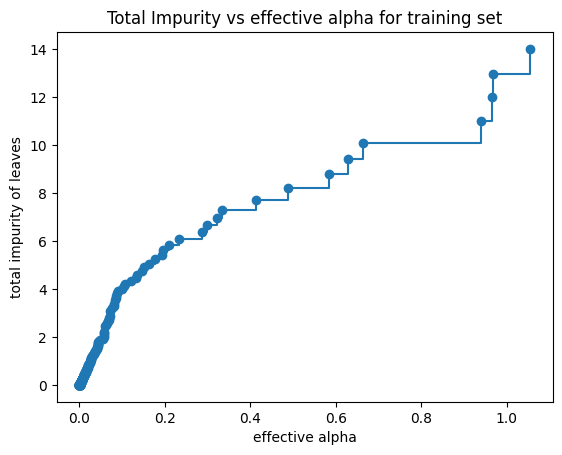

In [10]:
# generat the effective value of ccp_alpha
path = rg_tree.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# plot "Total Impurity and Effective Alpha for Training set"
# reference: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

plt.plot(ccp_alphas[:-5], impurities[:-5], marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set") 

<font color='limegreen'>
Observations:

- The graph clearly shows that if a larger effective alpha increases the total impurity of leaves.
- Considering that the increase in the total impurity of leaves indicates that the tree has more and more impure nodes, it is expected that the tree structure will be more complicated and worse performance.
- In the next section, we will seek which cpp_alpha should be chosen to minimize the RMSE.
</font>

Best complexity parameter is the ccp_alpha of 0.32092603266090447


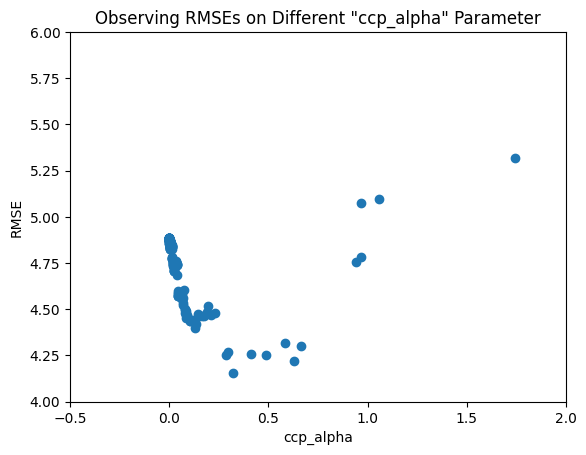

In [11]:
# Find the "ccp_alpha" whose RMSE is the smallest among all
rmses = {} # keys: rmse, values: alphas
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    rmse = mean_squared_error(test_y, pred) ** 0.5
    rmses[rmse] = alpha

# plot the relationships between rmses and alpha
plt.scatter(rmses.values(), rmses.keys())
# focusing on the data points whose alpha is less than 10
plt.xlim([-0.5, 2.0])
plt.ylim([4, 6])
# add labels
plt.title('Observing RMSEs on Different "ccp_alpha" Parameter')
plt.xlabel('ccp_alpha')
plt.ylabel('RMSE')

# get the best alpha
best_ccp_alpha = rmses[min(rmses)]
print(f'Best complexity parameter is the ccp_alpha of {best_ccp_alpha}')

<font color='limegreen'>
Observations:

- The graph shows the relationships between the parameter "ccp_alpha" and the RMSE.
- To show the best "ccp_alpha" whose RMSE is the lowest rate, I fixed the ranges of x- and y-axis.
- As we can see from the graph and the printed result, when the ccp_alpha is 0.32092603266090447, the RMSE is minimized.
- So, in this project, I will determine that this ccp_alpha is the best parameter. 
</font>

In [12]:
# based on the best ccp_alpha, create the model
best_model = DecisionTreeRegressor(random_state=0, ccp_alpha=best_ccp_alpha)
best_model.fit(train_X, train_y)
best_y_hat = best_model.predict(test_X)

print("RMSE of Best ccp_alpha: ", mean_squared_error(test_y, best_y_hat) ** 0.5)
print("RMSE of Initial Model: ", mean_squared_error(test_y, y_hat)**0.5)

RMSE of Best ccp_alpha:  4.156358920423987
RMSE of Initial Model:  4.883281985818567


<font color='limegreen'>
Observations:

- As we can clearly see it, the RMSE decreased compared to the initial tree model.
- It means that the prediction performance of the model slightly improved.

</font>

Text(0, 0.5, 'Errors')

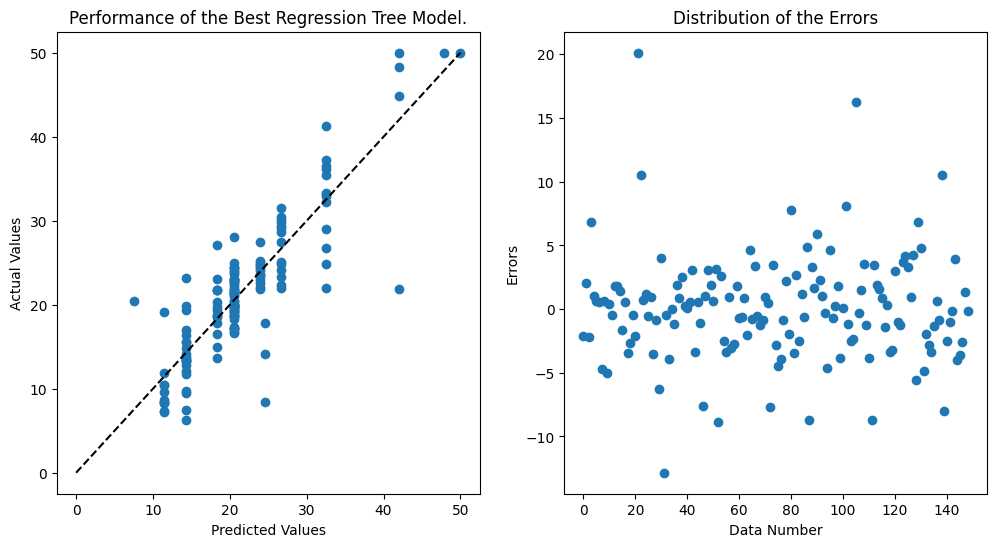

In [35]:
# create the figure sheet
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plotting the relationship between predicted and actual target values
ax[0].scatter(best_y_hat, test_y)
ax[0].plot([0, 50], [0, 50], '--k', transform = ax[0].transData)
ax[0].set_title('Performance of the Best Regression Tree Model.')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')

# checking the distribution of the predicted error
error = (best_y_hat.reshape(-1, 1) - test_y)
ax[1].scatter(range(len(error)), error)
ax[1].set_title("Distribution of the Errors")
ax[1].set_xlabel('Data Number')
ax[1].set_ylabel('Errors')

<font color='limegreen'>
Observations:

- Most data points are close the dot line, which shows a perfect prediction because the prediction is exactly the same as the actual values.
- If we observe the distribution of the predicted error, the data point will be constant; this behavior reflects that the number of data points above and below the dot line on the left chart is expected to be balanced.
- Although several data point has a larger error, the majority of the predicted errors are located at close to zero.
- All in all, this model has less risk of the homoscedasticity; there is no obvious trend or behaviour in the predicted errors, and they are expected to be random.

</font>

In [43]:
# generate the tree diagram
export_graphviz(best_model, 
                out_file = "boston_rg_tree.dot", 
                feature_names = X_cols)

<font color='limegreen'>
Here is the result of the tree diagram
</font>

<br><br>
<img src="boston_rg_tree.png" alt="title" width="800" height="400">

In [42]:
# generate predicted value based on given value

# giving the mean of all indepndent variables
mean_X = np.mean(df, axis=0).values[:-1].reshape(1, -1)
print("Mean of each feature:")
print(mean_X)
print("Pred-Target by Mean of Xs: ", best_model.predict(mean_X))
print('')
# giving the median of all independent variables
median_X = np.median(df, axis=0)[:-1].reshape(1, -1)
print('Median of each feature:')
print(median_X)
print("Pred-Target by Median of Xs: ", best_model.predict(median_X))

Mean of each feature:
[[2.67941657e+00 1.15927419e+01 1.09963911e+01 7.05645161e-02
  5.52422782e-01 6.29737097e+00 6.80520161e+01 3.83947399e+00
  9.25806452e+00 4.03040323e+02 1.84203629e+01 3.59887823e+02
  1.24502823e+01]]
Pred-Target by Mean of Xs:  [20.52314815]

Median of each feature:
[[2.43125e-01 0.00000e+00 8.56000e+00 0.00000e+00 5.32000e-01 6.21150e+00
  7.66000e+01 3.27590e+00 5.00000e+00 3.30000e+02 1.89000e+01 3.91705e+02
  1.12350e+01]]
Pred-Target by Median of Xs:  [20.52314815]


<font color='limegreen'>
Observations:

- In this phase, I applied the the mean and median of each feature (independent variable) to the model.
- In other words, if we assume the current distribution of the features, the target values are expected to be around 20.5 on average.
- Although the mean and median should be different variables in each feature, the result was the same; that's so interesting.

</font>